# Importing recquired libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [2]:
train_path = '../input/maizeonly/MaizeOnly'

In [3]:
image_size = 224
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)
batch_size = 64

In [4]:
train_aug = ImageDataGenerator(
    rescale=1/255.0,
    fill_mode="nearest",
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
)

train_data = train_aug.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 14377 images belonging to 5 classes.


# ResNet50

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [6]:
base_model = ResNet50(weights= None, include_top=False, input_shape= input_shape)


2022-07-17 17:55:04.032751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 17:55:04.179666: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 17:55:04.181004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-17 17:55:04.182602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
outputs = Dense(len(list(train_data.class_indices.keys())), activation="softmax")(x)
model = Model(inputs = base_model.input, outputs = outputs)

In [8]:
model.compile(optimizer= "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

# Model training

In [10]:
history = model.fit(
    train_data,
    epochs=50,
    steps_per_epoch=150,
    batch_size = batch_size
)

2022-07-17 17:55:10.880039: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-07-17 17:55:19.474654: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


150/150 [==============================] - 182s 1s/step - loss: 0.4802 - accuracy: 0.8299
Epoch 2/50
150/150 [==============================] - 154s 1s/step - loss: 0.2871 - accuracy: 0.8896
Epoch 3/50
150/150 [==============================] - 150s 998ms/step - loss: 0.2632 - accuracy: 0.9033
Epoch 4/50
150/150 [==============================] - 148s 988ms/step - loss: 0.2252 - accuracy: 0.9178
Epoch 5/50
150/150 [==============================] - 145s 967ms/step - loss: 0.1892 - accuracy: 0.9332
Epoch 6/50
150/150 [==============================] - 145s 965ms/step - loss: 0.1440 - accuracy: 0.9479
Epoch 7/50
150/150 [==============================] - 146s 972ms/step - loss: 0.1745 - accuracy: 0.9383
Epoch 8/50
150/150 [==============================] - 146s 971ms/step - loss: 0.1721 - accuracy: 0.9369
Epoch 9/50
150/150 [==============================] - 147s 974ms/step - loss: 0.1467 - accuracy: 0.9469
Epoch 10/50
150/150 [==============================] - 147s 979ms/step - loss: 0.

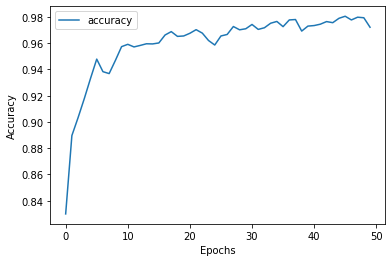

In [11]:
hist = history.history
plt.plot(hist["accuracy"], label="accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.show()

In [12]:
model.save("Maize.h5")

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


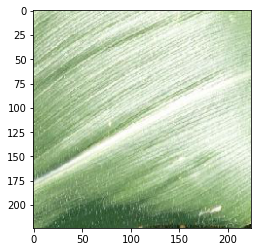

In [13]:
from tensorflow.keras.applications.resnet50 import preprocess_input
img_path = "../input/maizeonly/MaizeOnly/Corn_(maize)___healthy/00665f92-adb0-41eb-bba7-9eeadecfe10e___R.S_HL 8325 copy 2_90degFlipTB.jpg"
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = img/255.0
img_batch = np.expand_dims(img, axis=0)
plt.imshow(img)

In [14]:
predicted_class = np.argmax(model.predict(img_batch))
print(f"predicted class: {predicted_class}")
print("\nClass dictionary")
print(train_data.class_indices)

predicted class: 3

Class dictionary
{'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0, 'Corn_(maize)___Common_rust_': 1, 'Corn_(maize)___Northern_Leaf_Blight': 2, 'Corn_(maize)___healthy': 3, 'Other': 4}
